#**Practice Lab Neural Network 1**
### **Name:** Shivshankar Ghyar
### **Problem stmt:** The task is to develop a neural network that classifies images of handwritten digits (from the MNIST dataset) into their respective categories (0-9). The dataset consists of 28x28 grayscale images, and each image is accompanied by its corresponding label.

### Data Preparation:

The dataset is loaded from mnist_train.csv.

After shuffling, the first 1000 samples are used as the development set, and the rest for training.

Features (X_train, X_dev) are normalized for better convergence.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/mnist_train.csv')

In [8]:
print("Actual Dataset :\n",data)
data = np.array(data)
m, n = data.shape
print("Shape of Dataset:",m," ",n)
np.random.shuffle(data) # shuffle before splitting into dev and training sets


Actual Dataset :
 [[1 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]]
Shape of Dataset: 60000   785


In [9]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
print("Y_train: \n",Y_train)
Y_train.shape


Y_train: 
 [9 0 8 ... 6 0 1]


(59000,)

### Network Initialization:

Weights (W1, W2) and biases (b1, b2) are initialized with random values.
python
Copy
Edit


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [11]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


### Forward Propagation:

Input passes through the hidden layer using the ReLU activation function.
The output layer uses softmax for probabilities.

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Backward Propagation:

Calculates the gradients of weights and biases with respect to the loss function.

Uses the chain rule of differentiation.

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

### Parameter Updates:

Gradients are used to adjust weights and biases.

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

### Training:

The model trains for 500 iterations, printing accuracy every 10 iterations.


In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 7 4 ... 4 8 7] [9 0 8 ... 6 0 1]
0.16747457627118645
Iteration:  10
[8 0 5 ... 6 8 1] [9 0 8 ... 6 0 1]
0.23911864406779662
Iteration:  20
[8 0 5 ... 6 0 1] [9 0 8 ... 6 0 1]
0.3223050847457627
Iteration:  30
[8 0 4 ... 6 0 1] [9 0 8 ... 6 0 1]
0.38666101694915256
Iteration:  40
[4 0 4 ... 6 0 1] [9 0 8 ... 6 0 1]
0.446
Iteration:  50
[4 0 4 ... 6 0 1] [9 0 8 ... 6 0 1]
0.49789830508474575
Iteration:  60
[4 0 4 ... 6 0 1] [9 0 8 ... 6 0 1]
0.5437966101694915
Iteration:  70
[4 0 4 ... 6 0 1] [9 0 8 ... 6 0 1]
0.5823389830508474
Iteration:  80
[4 0 4 ... 6 0 1] [9 0 8 ... 6 0 1]
0.6131525423728813
Iteration:  90
[4 0 4 ... 6 0 1] [9 0 8 ... 6 0 1]
0.6398813559322034
Iteration:  100
[4 0 8 ... 6 0 1] [9 0 8 ... 6 0 1]
0.6621016949152543
Iteration:  110
[4 0 8 ... 6 0 1] [9 0 8 ... 6 0 1]
0.6818305084745763
Iteration:  120
[4 0 8 ... 6 0 1] [9 0 8 ... 6 0 1]
0.6984745762711865
Iteration:  130
[4 0 8 ... 6 0 1] [9 0 8 ... 6 0 1]
0.712271186440678
Iteration:  140
[4 0 8 ... 

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [9]
Label:  9


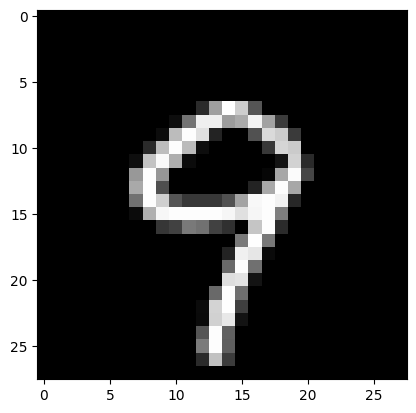

Prediction:  [0]
Label:  0


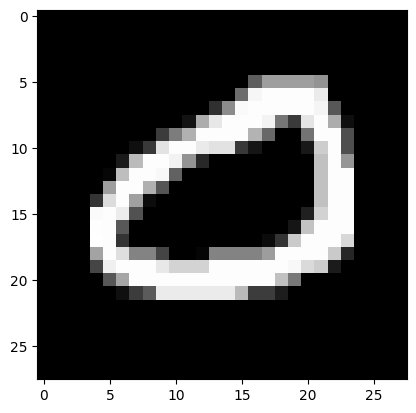

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)

In [16]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 0 5 7 3 5 2 8 9 4 5 1 8 3 8 5 9 3 2 1 5 9 5 5 5 0 1 6 1 5 9 4 3 7 2 5 6
 5 1 4 1 4 1 1 3 4 5 4 8 4 4 3 8 1 5 8 0 7 3 2 2 6 7 2 2 0 0 1 5 2 3 8 9 9
 3 0 8 1 0 4 9 0 1 9 8 3 9 5 3 7 1 1 1 2 0 7 9 7 3 9 6 0 4 1 3 4 1 7 4 3 4
 7 7 8 3 6 2 4 0 9 1 6 6 8 6 8 3 3 2 9 4 1 2 5 0 5 7 9 1 3 1 9 7 2 4 0 4 3
 1 2 0 2 8 9 1 6 0 5 9 1 8 9 6 6 8 9 8 2 3 4 0 3 1 1 4 2 5 3 5 2 4 0 7 9 2
 3 2 9 9 1 0 6 7 0 1 5 7 8 9 6 5 0 1 1 1 8 8 8 6 4 8 5 5 1 3 1 7 2 3 1 7 0
 2 0 0 8 0 3 0 7 8 9 1 0 3 5 7 3 1 4 3 4 2 9 6 5 1 2 9 6 7 0 9 2 2 4 4 7 6
 8 7 6 7 0 5 8 1 1 1 8 9 1 1 6 8 1 3 3 2 1 6 5 6 1 0 7 1 0 4 1 1 1 3 3 6 7
 5 0 4 0 6 6 5 2 3 3 4 5 7 6 1 5 2 5 9 7 0 2 0 0 7 9 1 1 6 1 0 5 3 7 8 3 9
 4 0 1 6 5 6 4 1 7 9 4 1 1 5 0 7 9 5 0 7 0 8 4 1 0 6 0 5 9 1 5 5 6 7 9 2 4
 9 1 6 4 8 8 1 8 8 2 3 7 1 9 6 8 2 8 0 8 6 9 3 6 3 1 2 7 2 2 5 3 0 2 9 0 9
 8 8 3 9 9 2 2 5 7 1 5 2 1 1 5 3 5 4 4 6 1 2 4 0 7 0 9 2 1 4 7 8 0 4 0 2 1
 1 4 6 1 1 4 9 7 2 9 0 0 3 1 9 2 6 0 3 4 6 8 5 3 5 3 8 4 3 0 4 5 2 5 4 7 4
 7 5 4 8 7 4 4 5 4 3 1 6 

0.864